<a href="https://colab.research.google.com/github/arvindhvasu/GL_Pneumonia_Detection/blob/Dev_Vijay/Project_CV_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stage 1 : Pre-Processing,Data Visualization,EDA**

1. Pre-Processing, Data Visualization, EDA
2. Dealing with missing values
3. Exploring the given Data files, classes and images of different classes.
4. Visualization of different classes
5. Analysis from the visualization of different classes.


## **Mount the Dataset from the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the necessary libraries for pre-processing 

*   **Pandas** - for data structures & data analysis
*   **Numpy** - for computing with array objects
*   **Scikitlearn**- for pre-preprocessing & prediction
*   **Matplotlib** - for plotting tool library
*   **Seaborn** - for data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from seaborn import countplot
from matplotlib.pyplot import figure, show
import os
!pip install pydicom
import pydicom as dcm
import matplotlib
from matplotlib.patches import Rectangle
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

# **Extracting & Loading the pneumonia dataset**

In [0]:
# importing required modules 
from zipfile import ZipFile

In [0]:
# specifying the zip file name 
capstone_project = "/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip"

In [0]:
# opening the zip file in READ mode 
with ZipFile(capstone_project, 'r') as zip: 
    # extracting all the files 
    zip.extractall()
   

In [7]:
#Set your project path 
capstone_project =  '/content'
import os
arr = os.listdir('/content')
print(arr)

['.config', 'stage_2_test_images', 'GCP Credits Request Link - RSNA.txt', 'stage_2_train_images', 'stage_2_detailed_class_info.csv', 'df_Train_Class_pickle', 'stage_2_sample_submission.csv', 'drive', 'stage_2_train_labels.csv', 'sample_data']


In [8]:
ls

 df_Train_Class_pickle                  stage_2_sample_submission.csv
 drive/                                 stage_2_test_images/
'GCP Credits Request Link - RSNA.txt'   stage_2_train_images/
 sample_data/                           stage_2_train_labels.csv
 stage_2_detailed_class_info.csv


## **Reading through the different classes of pneumonia to understand the Target Variable**

*   **No Lung Opacity/ Not Normal:** No Pneumonia but some abnormality observed
*   **Normal:** No Pneumonia observed
*   **Lung Opacity:** Pneumonia observed 

## **Reading through the Class Dataset**

In [0]:
df_class_info=pd.read_csv('/content/stage_2_detailed_class_info.csv')

In [10]:
df_class_info.shape

(30227, 2)

In [11]:
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [12]:
df_class_info.describe(include='all')

,patientId,class
count,30227,30227
unique,26684,3
top,31764d54-ea3b-434f-bae2-8c579ed13799,No Lung Opacity / Not Normal
freq,4,11821


In [13]:
df_class_info['patientId'].value_counts()

31764d54-ea3b-434f-bae2-8c579ed13799    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
3239951b-6211-4290-b237-3d9ad17176db    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
                                       ..
d0b456db-8309-43a4-a179-3d5db0791755    1
ff5efd4a-0777-41b9-82c7-b73b4073c509    1
a77b8b2a-4755-47d4-970b-8b4accc1cda1    1
92097b0f-44d8-4358-937d-cbf8c34c0732    1
ecd2fc2d-4670-469f-932b-df4ee2201ca5    1
Name: patientId, Length: 26684, dtype: int64

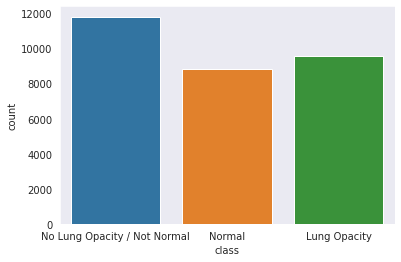

In [14]:
figure()
countplot(data=df_class_info,x="class")
show()

## **Reading through the Train Labels Dataset**

In [0]:
df_train_labels=pd.read_csv('/content/stage_2_train_labels.csv')

In [16]:
df_train_labels.shape


(30227, 6)

In [17]:
df_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [18]:
df_train_labels.describe(include='all')

,patientId,x,y,width,height,Target
count,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
unique,26684,NaN,NaN,NaN,NaN,NaN
top,31764d54-ea3b-434f-bae2-8c579ed13799,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,394.047724,366.839560,218.471376,329.269702,0.316108
std,NaN,204.574172,148.940488,59.289475,157.750755,0.464963
min,NaN,2.000000,2.000000,40.000000,45.000000,0.000000
25%,NaN,207.000000,249.000000,177.000000,203.000000,0.000000
50%,NaN,324.000000,365.000000,217.000000,298.000000,0.000000
75%,NaN,594.000000,478.500000,259.000000,438.000000,1.000000


In [19]:
df_train_labels['patientId'].value_counts()

31764d54-ea3b-434f-bae2-8c579ed13799    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
3239951b-6211-4290-b237-3d9ad17176db    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
                                       ..
d0b456db-8309-43a4-a179-3d5db0791755    1
ff5efd4a-0777-41b9-82c7-b73b4073c509    1
a77b8b2a-4755-47d4-970b-8b4accc1cda1    1
92097b0f-44d8-4358-937d-cbf8c34c0732    1
ecd2fc2d-4670-469f-932b-df4ee2201ca5    1
Name: patientId, Length: 26684, dtype: int64

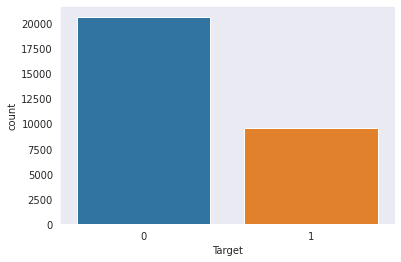

In [20]:
figure()
countplot(data=df_train_labels,x="Target")
show()

## **2. Dealing with missing values**

In [21]:
df_train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [22]:
df_class_info.isnull().sum()

patientId    0
class        0
dtype: int64

In [23]:
df_train_labels.groupby(["Target"]).count() 

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


In [24]:
df_class_info.groupby(["class"]).count() 

,patientId
class,
Lung Opacity,9555
No Lung Opacity / Not Normal,11821
Normal,8851


In [25]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [26]:
df_class_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [27]:
df_train_labels.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

In [28]:
df_class_info.columns

Index(['patientId', 'class'], dtype='object')

In [29]:
df_train_labels[df_train_labels['Target'] == 1]

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...
30220,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,316.0,504.0,179.0,273.0,1
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609.0,464.0,240.0,284.0,1
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [30]:
df_class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [31]:
round((df_class_info['class'].value_counts()/len(df_class_info.index) * 100),2)

No Lung Opacity / Not Normal    39.11
Lung Opacity                    31.61
Normal                          29.28
Name: class, dtype: float64

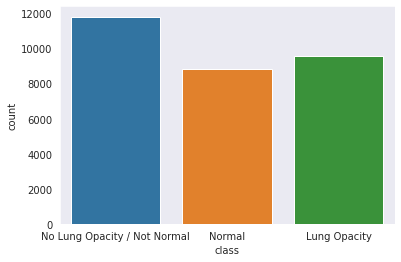

In [32]:
sns.countplot(df_class_info['class'])

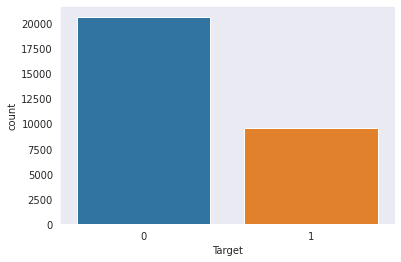

In [33]:
sns.countplot(df_train_labels['Target'])

**“Merging” two datasets is the process of bringing two datasets together into one & aligning the rows from each based on common attributes or columns,The words “merge” & “join” are used relatively interchangeably in Pandas & other languages**

**Merging two datasets "df_class_info,df_train_labels"**

In [0]:
df_Train_Class_labels=df_train_labels.merge(df_class_info, left_on='patientId', right_on='patientId', how='inner')

In [59]:
df_Train_Class_labels.shape

(37629, 7)

In [48]:
df_Train_Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37629 entries, 0 to 37628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  37629 non-null  object 
 1   x          16957 non-null  float64
 2   y          16957 non-null  float64
 3   width      16957 non-null  float64
 4   height     16957 non-null  float64
 5   Target     37629 non-null  int64  
 6   class      37629 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ MB


In [49]:
df_Train_Class_labels.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [50]:
df_Train_Class_labels['patientId'].value_counts()

31764d54-ea3b-434f-bae2-8c579ed13799    16
0ab261f9-4eb5-42ab-a9a5-e918904d6356    16
3239951b-6211-4290-b237-3d9ad17176db    16
8dc8e54b-5b05-4dac-80b9-fa48878621e2    16
1c44e0a4-4612-438f-9a83-8d5bf919cb67    16
                                        ..
d0b456db-8309-43a4-a179-3d5db0791755     1
ff5efd4a-0777-41b9-82c7-b73b4073c509     1
a77b8b2a-4755-47d4-970b-8b4accc1cda1     1
92097b0f-44d8-4358-937d-cbf8c34c0732     1
ecd2fc2d-4670-469f-932b-df4ee2201ca5     1
Name: patientId, Length: 26684, dtype: int64

In [51]:
df_Train_Class_labels['patientId'].describe(include='all')

count                                    37629
unique                                   26684
top       31764d54-ea3b-434f-bae2-8c579ed13799
freq                                        16
Name: patientId, dtype: object

In [0]:
df_Train_Class_labels = df_Train_Class_labels.drop_duplicates()

In [61]:
print("Unique Patient Id: ", df_Train_Class_labels['patientId'].nunique())

Unique Patient Id:  26684


In [62]:
TestPatientID = df_Train_Class_labels["patientId"][0]
TestPatientID = TestPatientID+'.dcm'
dicom_file_loc = os.path.join("/content/stage_2_train_images",TestPatientID)
dicom_file_dataset = dcm.read_file(dicom_file_loc)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

**OS module in python provides functions for interacting with the operating system,OS.listdir() method in python is used to get the list of all files and directories in the specified directory**

In [56]:
import os
image_train_loc = os.listdir('/content/stage_2_train_images')
image_test_loc = os.listdir('/content/stage_2_test_images')
print("Number of images in train set:", len(image_train_loc),"\nNumber of images in test set:", len(image_test_loc))

Number of images in train set: 26684 
Number of images in test set: 3000


In order to work with the Medical images that are stored in a special format called DICOM files - (*Dcm),we would need to install the package to create an understanding of the image type & gives the opportunity to further explore it

In [64]:
pip install pydicom

In [65]:
import pydicom, glob, pylab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

patientId = df_class_info['patientId'][1] #No lung opacity/ Not normal
dcm_train = '/content/stage_2_train_images/%s.dcm' % patientId
dcm_med = pydicom.read_file(dcm_train)
print(dcm_med)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [66]:
pip install common

In [0]:
#!python3 "/content/common.py"
import common as com

In [0]:
def display_images(data):
	    img_data = list(data.T.to_dict().values())
	    #img_data = list(data)
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images',imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
	    plt.show()
	    
def display_images_with_boxes(data):
	    img_data = list(data.T.to_dict().values())
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images',imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
              rows = df_Train_Class_labels[df_Train_Class_labels['patientId']==data_row['patientId']]
              box_data = list(rows.T.to_dict().values())
              for j, row in enumerate(box_data):
                  ax[i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                      width=row['width'],height=row['height'], 
                      linewidth=1,edgecolor='r',facecolor='none'))   
	    plt.show()
   
def collect_metadata(data, location):
	    dcm_columns = None

	    for n, pid in enumerate(data['patientId'].unique()):
              imageName = pid+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images/', imageName)
              dcm_data = dcm.read_file(imagePath)
              """ 
              if not dcm_columns:
                  dcm_columns = dcm_data.dir()

              for col in dcm_columns:
                  if col in ["PatientAge", "PatientSex", "ViewPosition"]:
                        value = dcm_data.data_element(col).value
                        index = data[data['patientId'] == pid].index
                        data.loc[index, col] = value
                """ 
              index = data[data['patientId'] == pid].index
              data.loc[index, "PatientAge"] = dcm_data.data_element("PatientAge").value
              data.loc[index, "PatientSex"] = dcm_data.data_element("PatientSex").value
              data.loc[index, "ViewPosition"] = dcm_data.data_element("ViewPosition").value
              del dcm_data

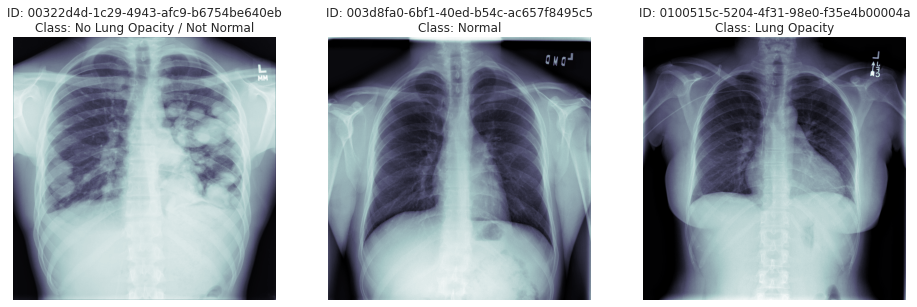

In [69]:
uni_patient_id = ['00322d4d-1c29-4943-afc9-b6754be640eb','003d8fa0-6bf1-40ed-b54c-ac657f8495c5','0100515c-5204-4f31-98e0-f35e4b00004a']
test_df = df_Train_Class_labels[df_Train_Class_labels.patientId.isin(uni_patient_id)]
display_images(test_df)

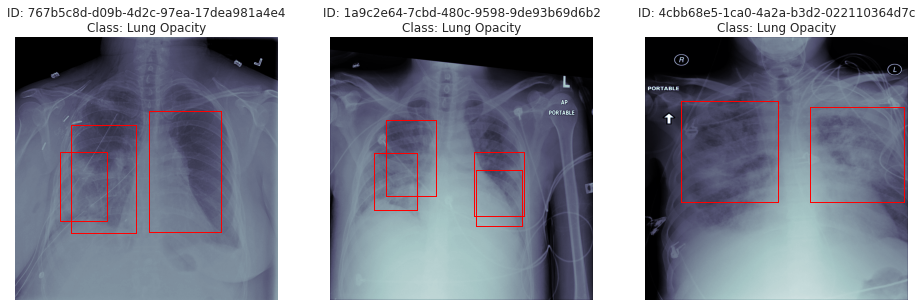

In [76]:
Test_tar_df = df_Train_Class_labels[df_Train_Class_labels['Target']==1].sample(5)
display_images_with_boxes(Test_tar_df)

In [82]:
collect_metadata(df_Train_Class_labels,"")
df_Train_Class_labels.head()


,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,F,AP


In [0]:
import pickle
file_Name = "df_Train_Class_pickle"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df_Train_Class_labels to the
# file named 'df_Train_Class_pickle'
pickle.dump(df_Train_Class_labels, fileObject)   

# here we close the fileObject
fileObject.close()

In [84]:
file_Name = "/df_Train_Class_pickle"
# we open the file for reading
fileObject = open(capstone_project+file_Name,'rb')  
# load the object from the file into temp var b
df_Train_Class_pic = pickle.load(fileObject)  
df_Train_Class_pic.head(5)

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,F,AP


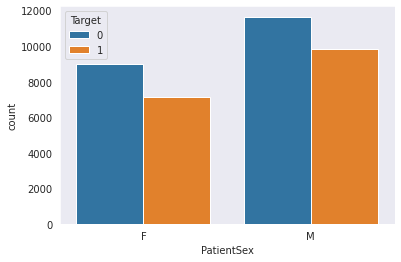

In [85]:
countplot(data = df_Train_Class_pic, x = 'PatientSex', hue = 'Target');

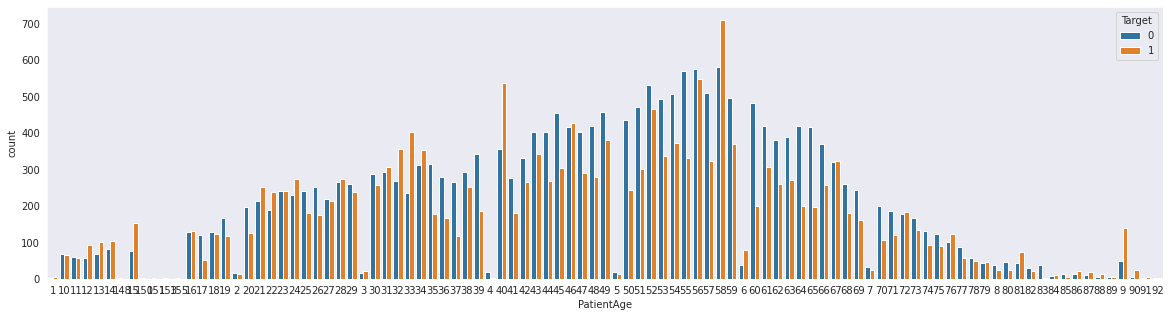

In [98]:
figure(figsize = (20, 5))
countplot(data = df_Train_Class_pic, x = 'PatientAge', hue = 'Target');

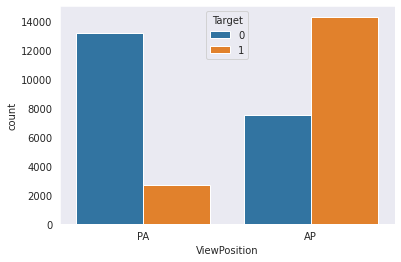

In [99]:
countplot(data = df_Train_Class_pic, x = 'ViewPosition', hue = 'Target');

0    20672
1    16957
Name: Target, dtype: int64

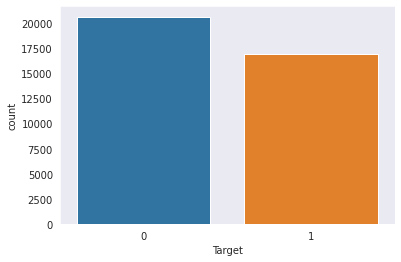

In [100]:
countplot(data=df_Train_Class_pic,x="Target")
df_Train_Class_pic["Target"].value_counts()

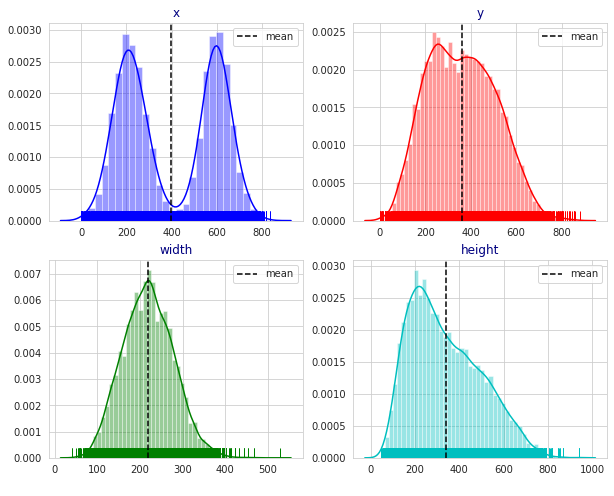

In [101]:
#Distribution of Bounding Boxes
#We use only the rows which have bounding boxes
data_bb = df_Train_Class_pic[df_Train_Class_pic['Target'] == 1]
data_bb = data_bb[['x','y','width','height']]
sns.set_style('whitegrid')

cols = [i for i in data_bb.columns]
length = len(cols)
fig = plt.figure(figsize = (10,8))

import itertools
cs = ["b","r","g","c"]
for i,j,k in itertools.zip_longest(cols, range(length), cs):
  plt.subplot(2,2, j+1)
  ax = sns.distplot(data_bb[i], color = k, rug = True)
  ax.set_facecolor("w")
  plt.axvline(data_bb[i].mean(), linestyle = 'dashed', label = 'mean', color = 'k')
  plt.legend(loc = 'best')
  plt.title(i, color = 'navy')
  plt.xlabel(" ")

In [0]:
#Create a new column 'area' to capture of area of bounding boxes
df_Train_Class_pic['area'] = df_Train_Class_pic['height'] * df_Train_Class_pic['width']

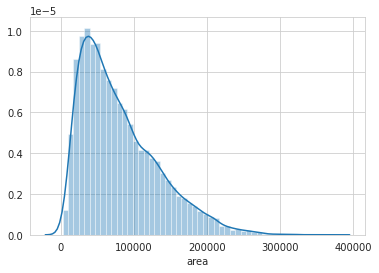

In [103]:
#Distribution of infected areas
sns.distplot(df_Train_Class_pic['area'])

In [107]:
df_Train_Class_pic = df_Train_Class_pic['patient_age'].astype('int64')
df_Train_Class_pic.describe(include = 'all')

KeyError: ignored

In [104]:
df_Train_Class_pic.dtypes

patientId        object
x               float64
y               float64
width           float64
height          float64
Target            int64
class            object
PatientAge       object
PatientSex       object
ViewPosition     object
area            float64
dtype: object

In [92]:
#Distribution of patient_age
plt.figure(figsize = (10,5))
sns.boxplot(df_Train_Class_pic['patient_age'])

KeyError: ignored

<Figure size 720x360 with 0 Axes>

In [93]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_Train_Class_pic, test_size=0.25,
                                    stratify=df_Train_Class_pic['Target'])
print(df_train.shape, 'training data')
print(df_val.shape, 'validation data')

(28221, 11) training data
(9408, 11) validation data


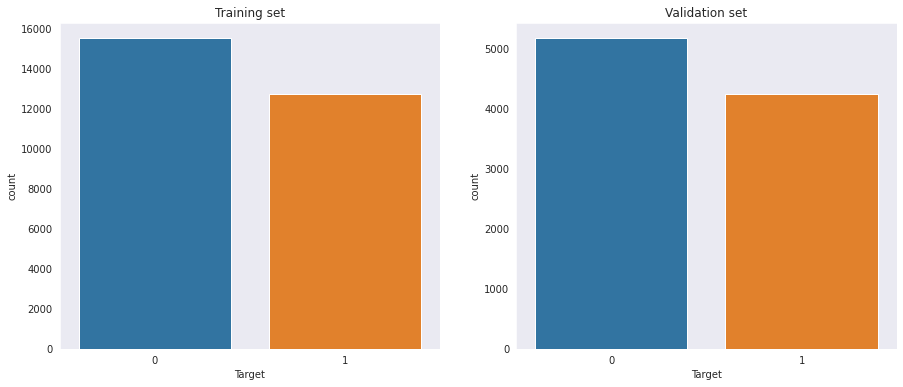

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("Training set")
ax2.set_title("Validation set")
countplot(data=df_train,x="Target", ax= ax1)
countplot(data=df_val,x="Target", ax= ax2)
show()

In [95]:
print("The value count of Target column in train dataset...")
df_train["Target"].value_counts()

The value count of Target column in train dataset...


0    15504
1    12717
Name: Target, dtype: int64

In [96]:
print("The value count of Target column in validation dataset...")
df_val["Target"].value_counts()

The value count of Target column in validation dataset...


0    5168
1    4240
Name: Target, dtype: int64

In [0]:
df_train_pick = "df_T_pickle"
df_val_pick = "df_V_pickle"

# open the file for writing
fileObject = open(df_train_pick,'wb') 
fileObject1 = open(df_val_pick,'wb') 

pickle.dump(df_train, fileObject) 
pickle.dump(df_val, fileObject1)   

# here we close the fileObjects
fileObject.close()
fileObject1.close()

**Binning**


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

raw_df = pd.read_excel('')
df = raw_df.groupby(['', 'name'])[''].sum().reset_index()

df[''].plot(kind='hist')

**MODELLING :**



In [0]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

seed = 232
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
input_path = '../input/chest-xray-pneumonia//chest_xray/chest_xray/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))


In [0]:
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_infect = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    print('Set: {}, normal images: {}, pneumonia images: {}'.format(_set, n_normal, n_infect))

In [0]:
def process_data(img_dims, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
    train_gen = train_datagen.flow_from_directory(
    directory=input_path+'train', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)

    test_gen = test_val_datagen.flow_from_directory(
    directory=input_path+'test', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)
    
    # I will be making predictions off of the test set in one batch size
    # This is useful to be able to get the confusion matrix
    test_data = []
    test_labels = []

    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(input_path + 'test' + cond)):
            img = plt.imread(input_path+'test'+cond+img)
            img = cv2.resize(img, (img_dims, img_dims))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    return train_gen, test_gen, test_data, test_labels

In [0]:
img_dims = 150
epochs = 10
batch_size = 32

train_gen, test_gen, test_data, test_labels = process_data(img_dims, batch_size)

In [0]:
inputs = Input(shape=(img_dims, img_dims, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [0]:
hist = model.fit_generator(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['acc'][-1])*100, 2)))

Image recognition with keras

In [0]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

In [0]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [0]:
root_dir = os.path.abspath('../..') data_dir = os.path.join(root_dir, 'data') sub_dir = os.path.join(root_dir, 'sub') # check for existence os.path.exists(root_dir) os.path.exists(data_dir) os.path.exists(sub_dir)

In [0]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))

train.head()

In [0]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [0]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [0]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)


In [0]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [0]:
train.label.ix[split_size:]

In [0]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# import keras modules

from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential([
  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [0]:
pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print "Prediction is: ", pred[test_index]

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [0]:
sample_submission.filename = test.filename; sample_submission.label = pred
sample_submission.to_csv(os.path.join(sub_dir, 'sub02.csv'), index=False)

**Hyperparameter**

In [0]:
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

In [0]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [0]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

In [0]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))

temp = []
for img_name in train.filename:
  image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
  img = imread(image_path, flatten=True)
  img = img.astype('float32')
  temp.append(img)

train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
  image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
  img = imread(image_path, flatten=True)
  img = img.astype('float32')
  temp.append(img)

test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [0]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [0]:
# define vars
input_num_units = 784
hidden_num_units = 500
output_num_units = 10
epochs = 5
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_500 = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [0]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [0]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [0]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop_more_epochs = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [0]:
# define vars
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 25
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_deep_n_wide = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [0]:
pred = model.predict_classes(test_x)
 sample_submission.filename = test.filename; sample_submission.label = pred
 sample_submission.to_csv(os.path.join(sub_dir, 'sub03.csv'), index=False)

In [0]:
# reshape data

train_x_temp = train_x.reshape(-1, 28, 28, 1)
val_x_temp = val_x.reshape(-1, 28, 28, 1)

# define vars
input_shape = (784,)
input_reshape = (28, 28, 1)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, 4, 4, activation='relu'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_conv = model.fit(train_x_temp, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x_temp, val_y))